In [42]:
# importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [43]:
pip install scikitplot --user


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement scikitplot (from versions: none)
ERROR: No matching distribution found for scikitplot


In [44]:
# reading the dataset
data = pd.read_csv("diabetes.csv")
data.head()
#data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [45]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [46]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no missing values in the dataset

## visualizing how data is distributed in every column

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

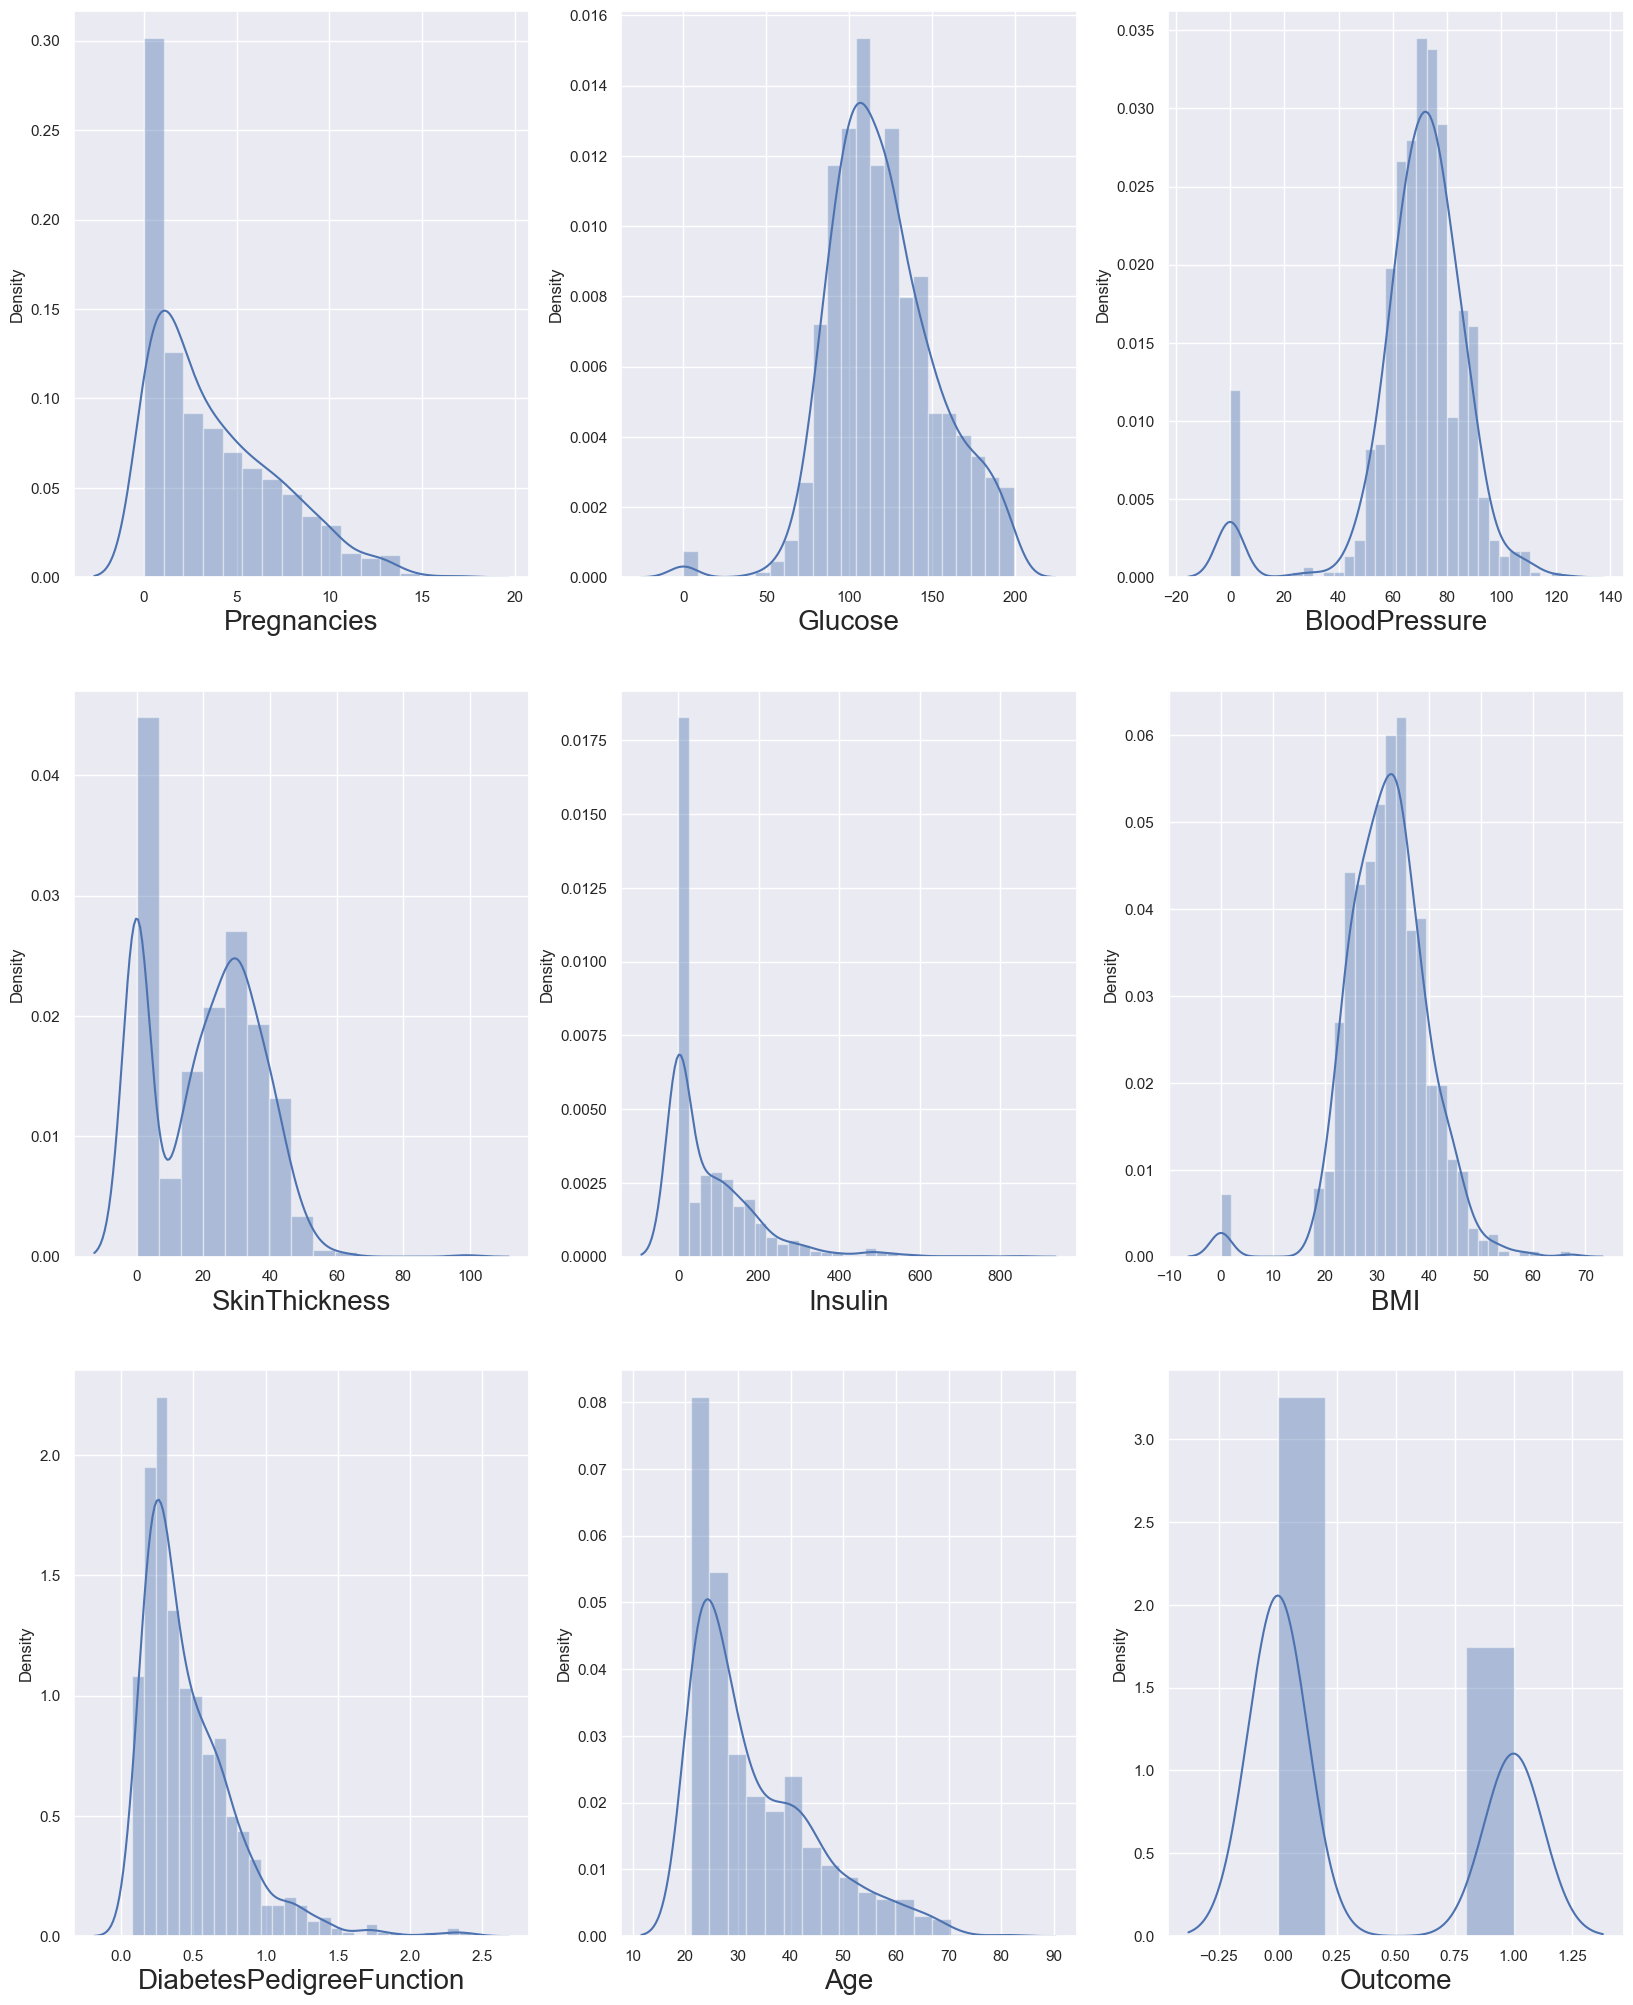

In [47]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

it is clear that there is skewness in the dataset, meaning that it is normallized
many models assume that the data is distributed around the mean

from the visualization it is clear that some columns such as gluclose, insuline, skin thickness, BMI,  and blood pressure have values zero, which is not possible.
To solve this we can either remove this values or replace with the respective mean.

In [48]:
data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())
data['BMI'] = data['BMI'].replace(0, data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].mean())

In [49]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

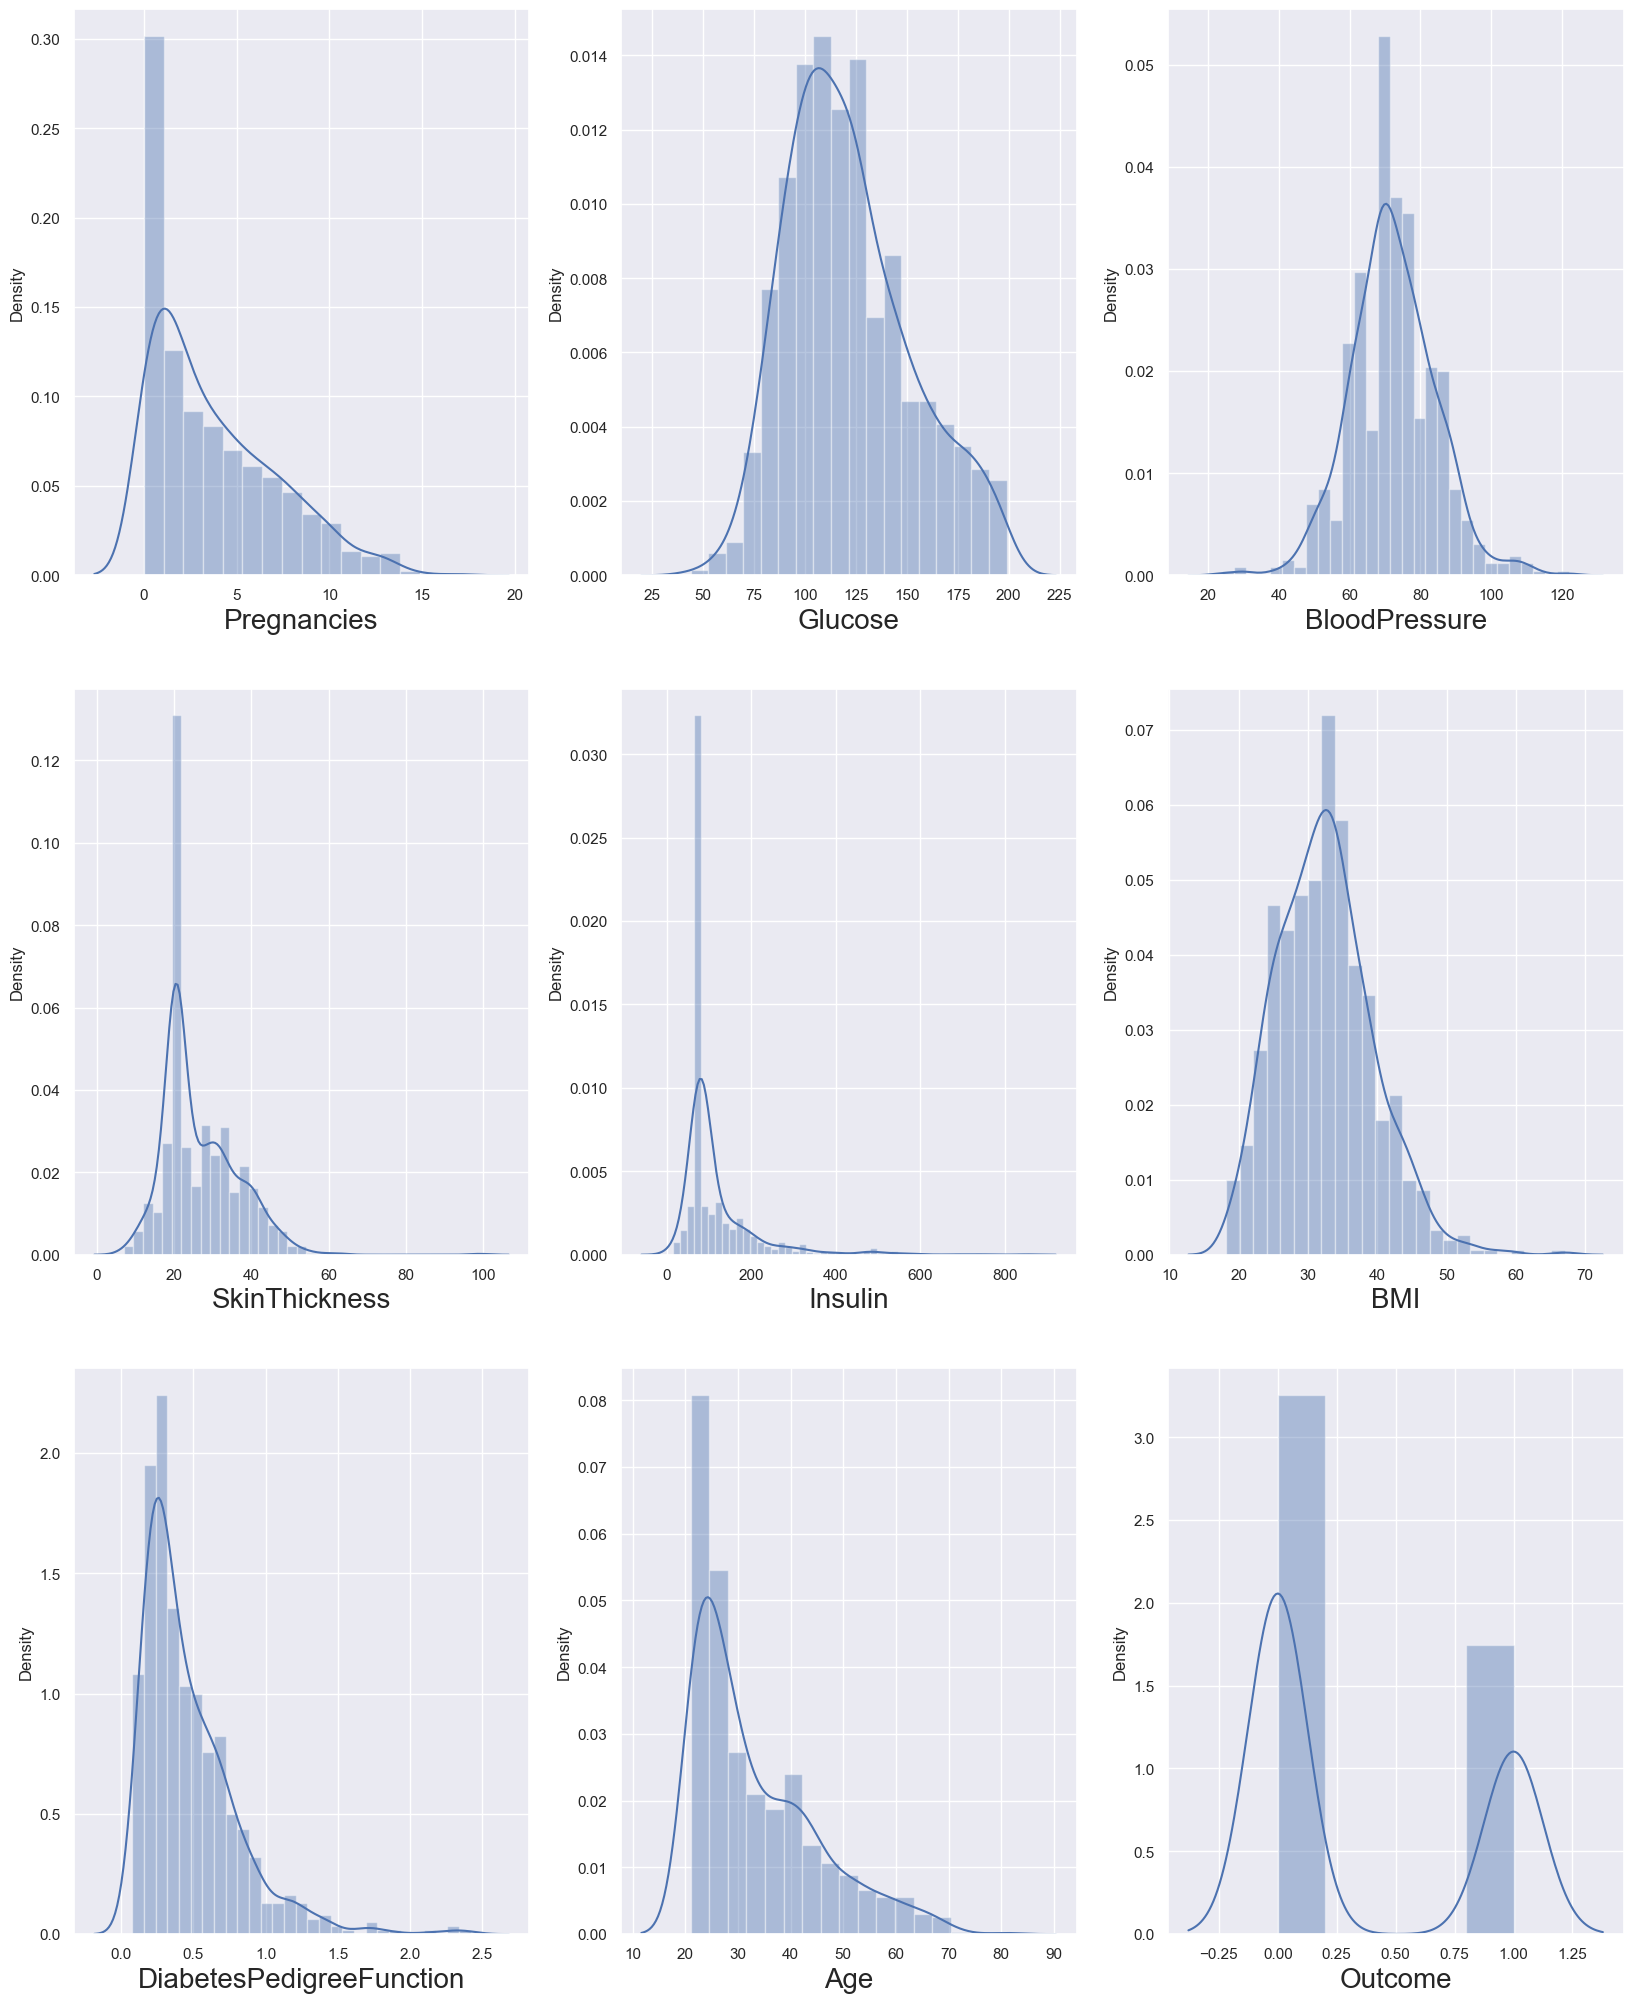

In [50]:
# describing the data to see if there is still zero values in the crutial columns
plt.figure(figsize = (20, 25), facecolor = 'white')
plotnumber = 1

for column in data:
    if plotnumber <=9: # since the columns are 9
        ax = plt.subplot(3,3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

The zero columns have been dealt with in the crutial columns where data cant be zero.

Outliers are present in some columns.


<AxesSubplot:>

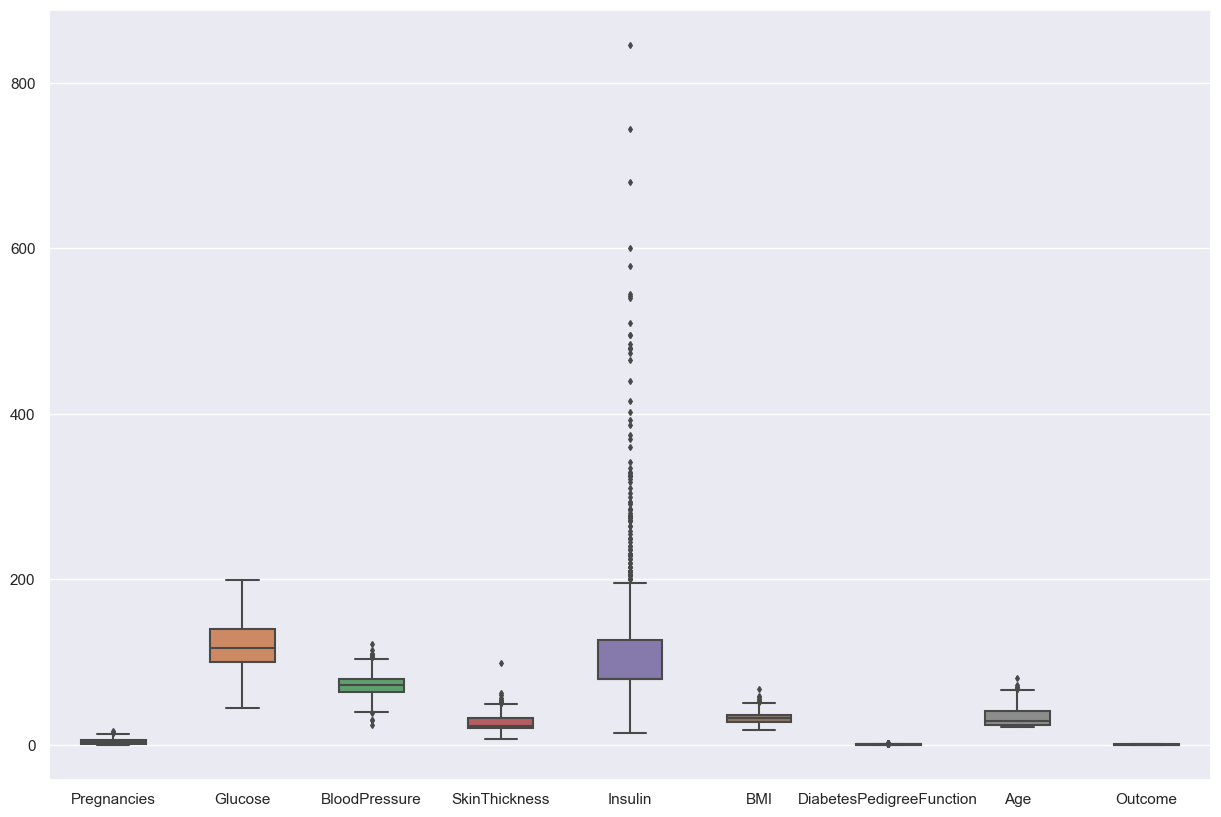

In [51]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.boxplot(data=data, width=0.5, ax=ax, fliersize=3)

In [52]:
q = data['Pregnancies'].quantile(0.98)
# we are removing the top 2% data from the pregnancies column
data_cleaned = data[data['Pregnancies']<q]

q = data['SkinThickness'].quantile(0.99)
# removing the top 1% from the SkinThickness column
data_cleaned = data[data['SkinThickness']<q]

q = data['Insulin'].quantile(0.95)
# removing the top 5% from the Insulin column
data_cleaned = data[data['Insulin']<q]

q = data['BMI'].quantile(0.99)
# removing the top 1% from the BMI column
q = data[data['BMI']<q]

q = data['DiabetesPedigreeFunction'].quantile(0.99)
# removing the top 1% from the DiabetesPedigreeFunction
q = data[data['DiabetesPedigreeFunction']<q]

q = data['Age'].quantile(0.99)
# removing the top 1% from the age column
data_cleaned = data[data['Age']<q]

In [53]:
data_cleaned

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


### visualizing how the dataset is after removing the outliers and the zero's in the crutial columns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

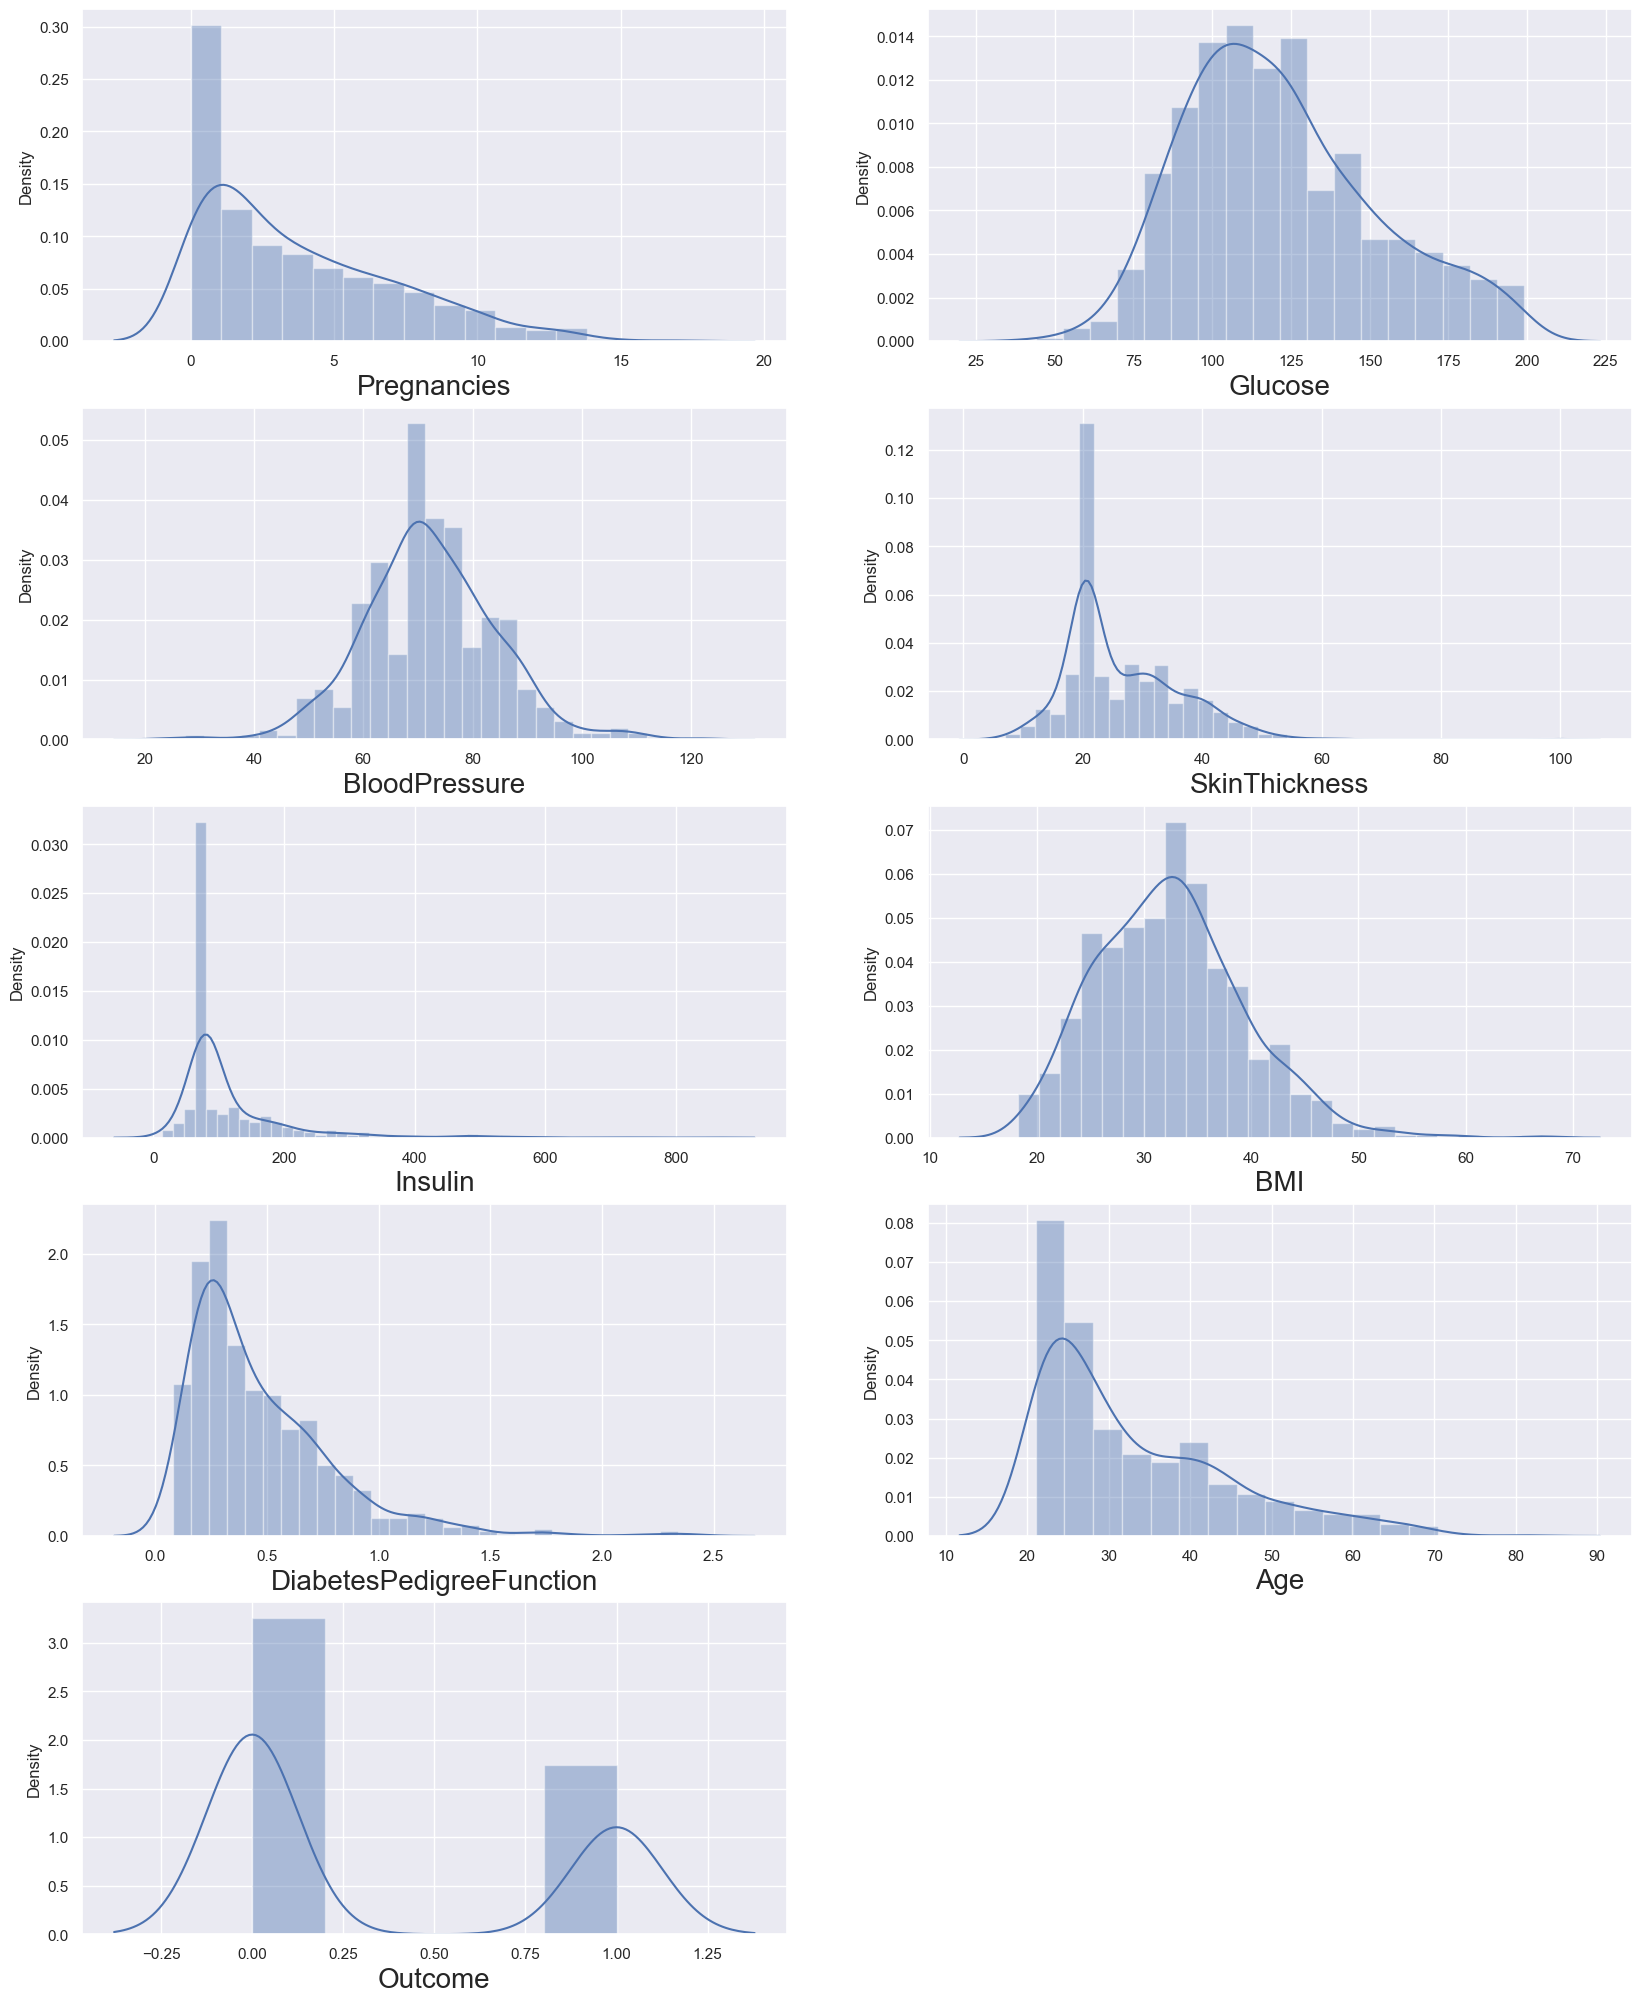

In [54]:
plt.figure(figsize = (20, 25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber <=9: # since the number of columns is 9
        ax = plt.subplot(5,2, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

The data now looks much better than before

now we should start analysis as we dont want to lose more information while preprocessing the data

if the data doesnt look good we will come back fro more preprocessing

### separating the independent variable from the dependent variable

In [55]:
X = data_cleaned.drop('Outcome', axis=1)
y = data_cleaned['Outcome']

In [56]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [57]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 759, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

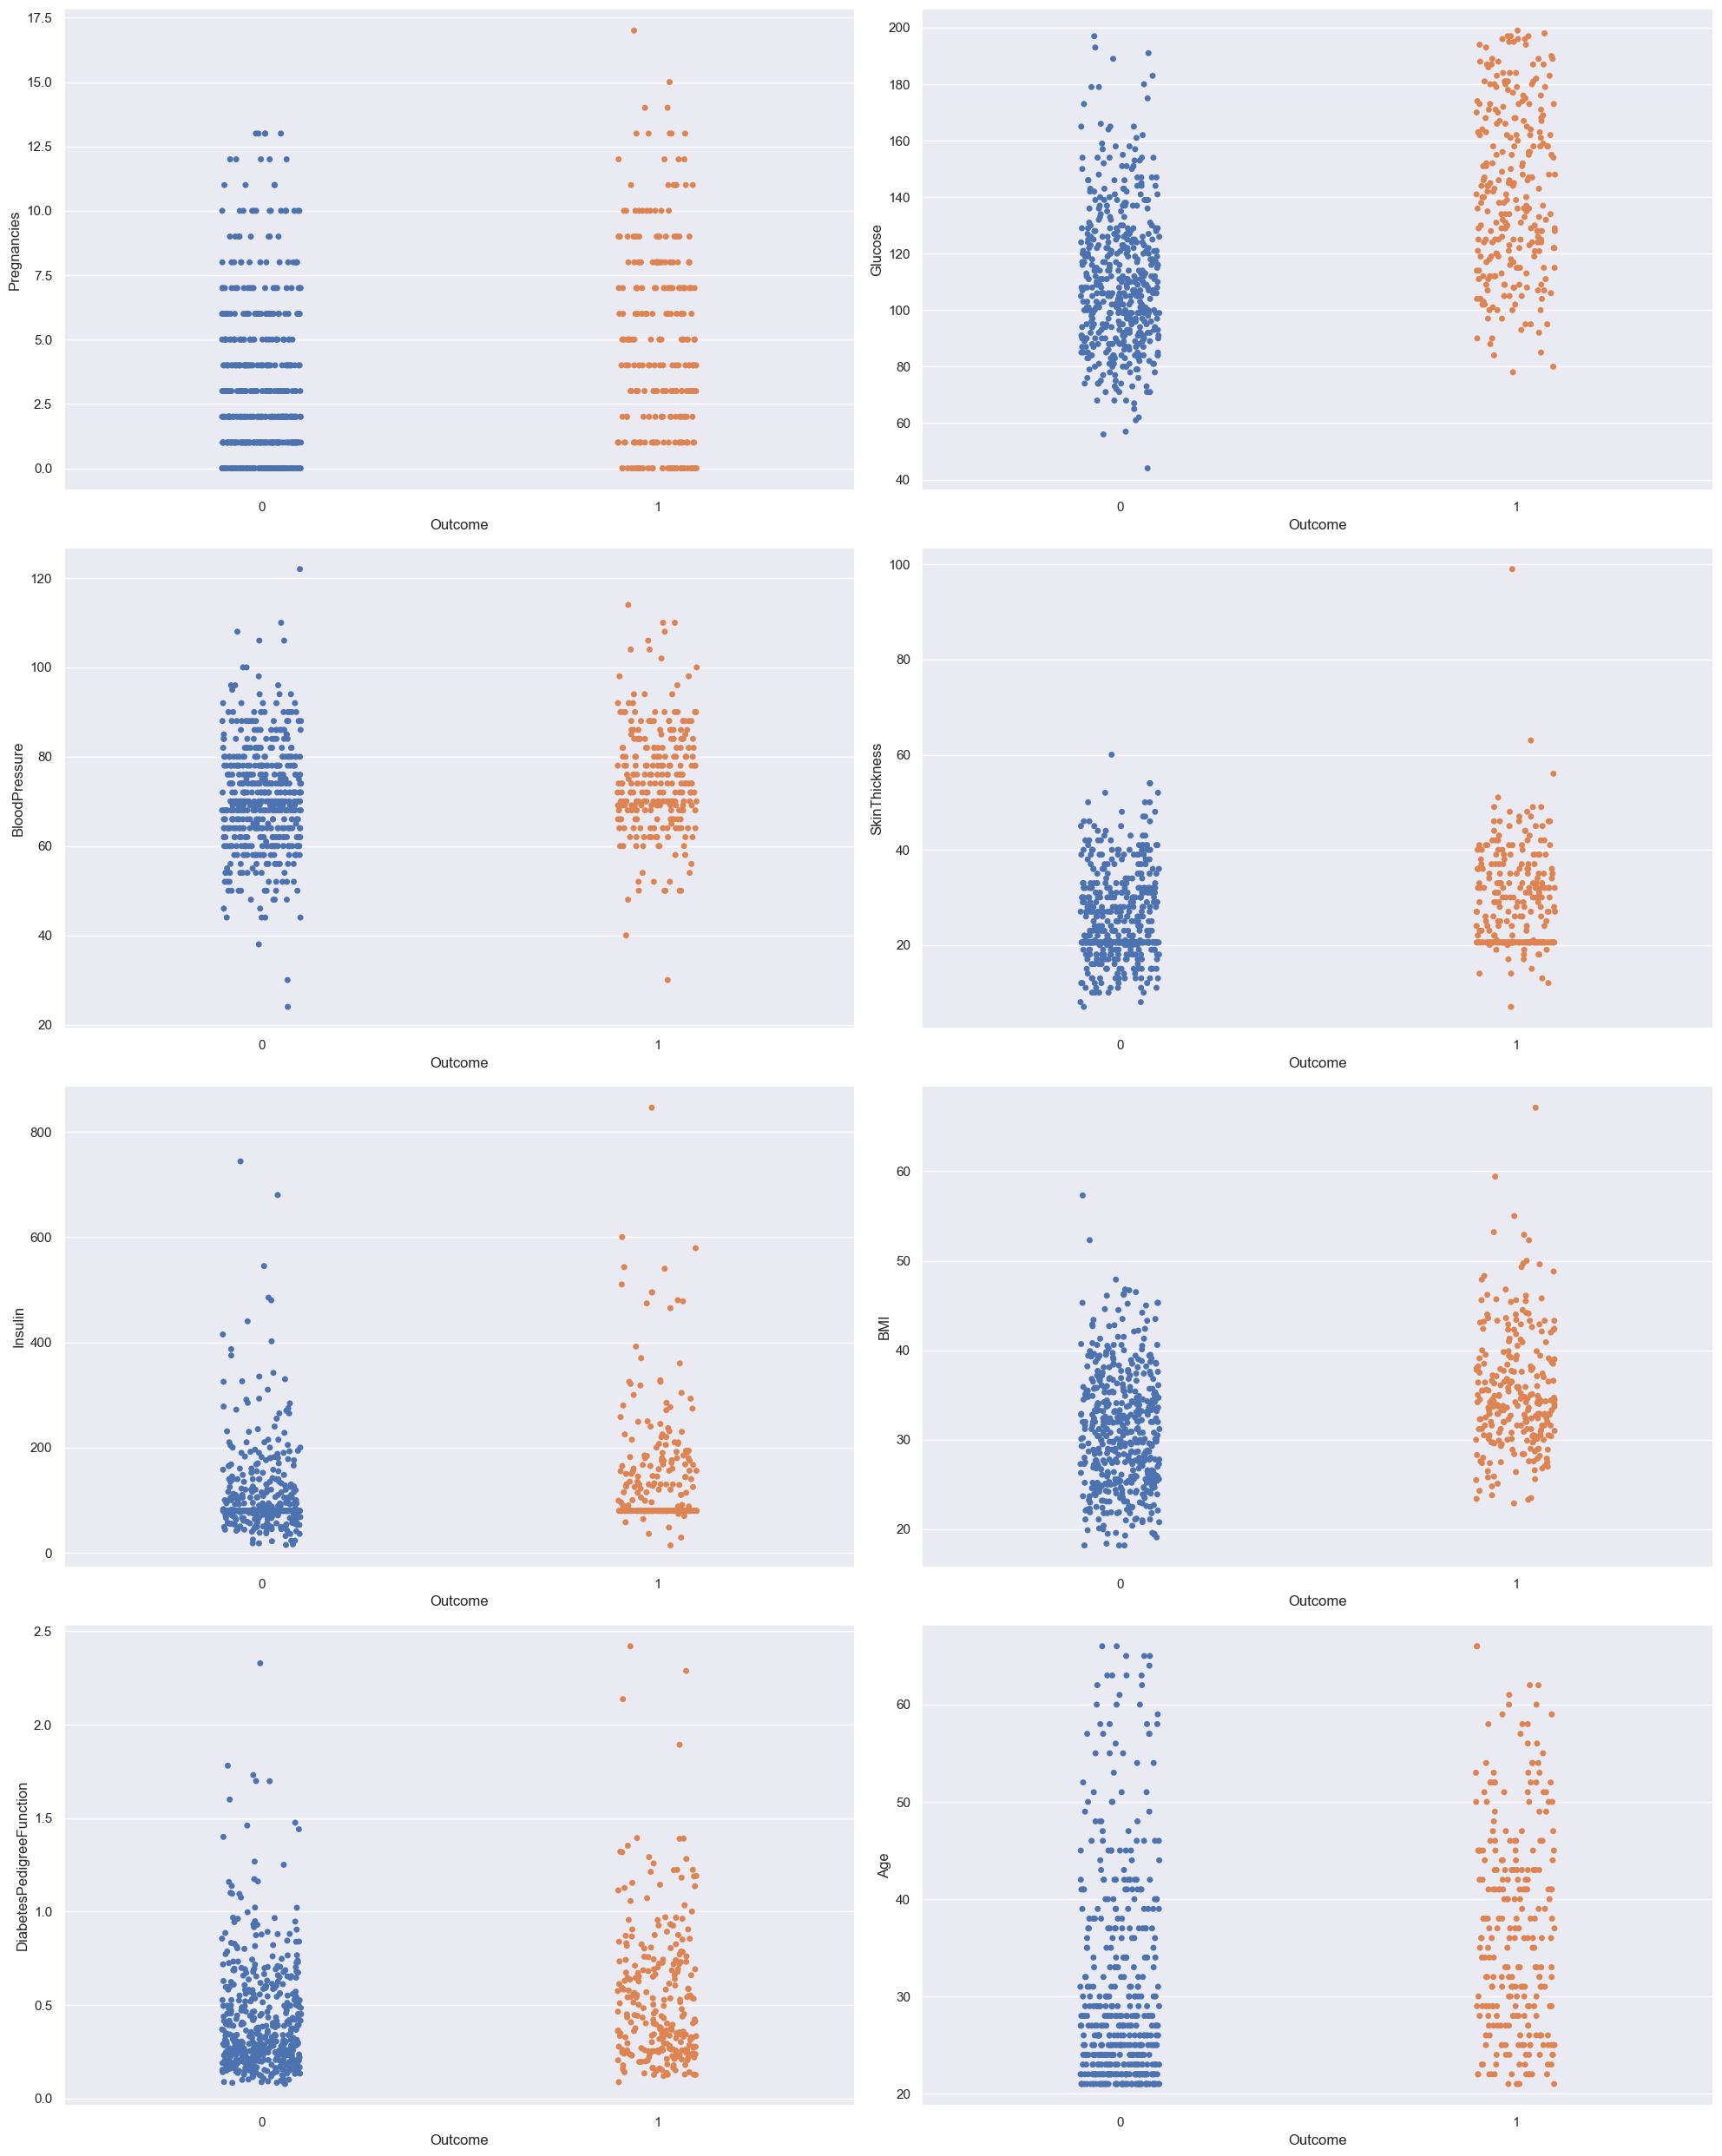

In [58]:
## visualizing the relationship between the independent variable and the dependent variable
plt.figure(figsize=(20, 25))
plotnumber = 1

for column in data:
    if plotnumber <=8:
        ax = plt.subplot(4,2, plotnumber)
        sns.stripplot(y, X[column])
    plotnumber+=1
plt.tight_layout()


checking the multicollinearity between the dependent variables

before that we should first scale our data using the standard scaler


In [59]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)



In [60]:
# after scaling this how the data looks like
x_scaled

array([[ 0.64327075,  0.87008298, -0.01698412, ...,  0.16090077,
         0.46879263,  1.54828125],
       [-0.83984741, -1.20656984, -0.51093456, ..., -0.85816238,
        -0.36177415, -0.16252742],
       [ 1.23651801,  2.02377899, -0.6755847 , ..., -1.33857787,
         0.60421113, -0.07248486],
       ...,
       [ 0.34664712, -0.01991109, -0.01698412, ..., -0.91639456,
        -0.68075995, -0.25256998],
       [-0.83984741,  0.14490263, -1.00488499, ..., -0.3486308 ,
        -0.36779275,  1.27815356],
       [-0.83984741, -0.9428679 , -0.18163427, ..., -0.30495667,
        -0.47010895, -0.88286791]])

In [61]:
# checking for multicollinearity using VIF
variables = x_scaled  # this are my independent variables which i have scalled

# creating an empty dataframe
vif = pd.DataFrame()

# i make a variance inflation factor which will output the respective vifs
vif['vif'] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

# creating the feature names
vif['features'] = X.columns


In [62]:
vif

,vif,features
0,1.484572,Pregnancies
1,1.354580,Glucose
2,1.247898,BloodPressure
3,1.455095,SkinThickness
4,1.264776,Insulin
5,1.551161,BMI
6,1.058847,DiabetesPedigreeFunction
7,1.680199,Age


All the VIF values are below than five and there are very small which means that there is no multicollinearity.

In [63]:
# splitting the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=355)

In [64]:
# feeding the data into the model
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [65]:
# saving the model into the file
import pickle
with open('finalized_pickle_model', 'wb') as file:
    pickle.dump(log_reg, file)
    file.close()

In [66]:
# saving the standard scaler model into the file
with open('standardscaler.sav', 'wb') as file:
    pickle.dump(scaler, file)

In [67]:
# evaluation how the model performs with the test data
y_pred = log_reg.predict(x_test)

In [68]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7631578947368421

In [69]:
conf_mat = confusion_matrix(y_test, y_pred)

print(conf_mat)

[[106  17]
 [ 28  39]]


In [70]:
type(confusion_matrix)

function

In [77]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [84]:
# breaking down the formular for accuracy
accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)
accuracy

0.7631578947368421

In [85]:
# precision
precision = (true_positive) / (true_positive + false_positive)
precision

0.8617886178861789

In [86]:
# recall
recall = (true_positive) / (true_positive + false_negative)
recall

0.7910447761194029

In [88]:
# f1_score - this is the mean of precision and sensitivity
f1_score = 2*(recall * precision) / (recall + precision)
f1_score

0.8249027237354086

In [90]:
# area under the curve
auc = roc_auc_score(y_test, y_pred)
auc

0.7219390850624925

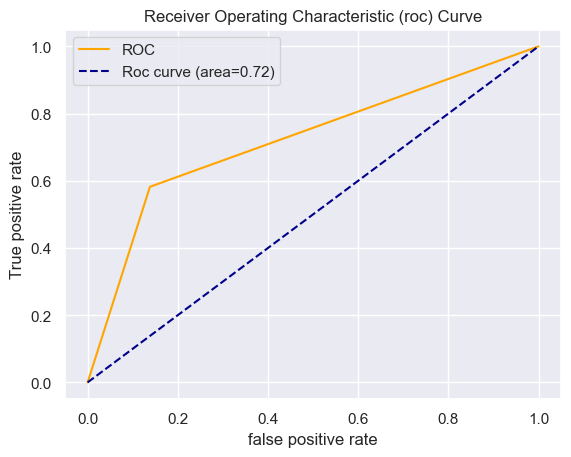

In [93]:
# drawing ROC curve and auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle='--', label='Roc curve (area=%0.2f)'% auc)
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic (roc) Curve')
plt.legend()
plt.show()